In [3]:
import requests
import json
from config import gkey
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# # set up a parameters dictionary
state_abbr= ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
type ="total"
api_key = gkey

# # base url
base_url = "https://developer.nrel.gov/api/cleap/v1/state_co2_emissions?"

# # run a request using our params dictionary
# response = requests.get(base_url, params=params)
state_data = []
state = []
for state in state_abbr:
    target_url = (f'{base_url}state_abbr={state}&type={type}&api_key={api_key}')
    response = requests.get(target_url)
    states_data = response.json()
    state_data.append(states_data['result'][-1]['data'])

In [5]:
emissions_df = pd.DataFrame(state_data)
emissions_df["State"] = state_abbr
emissions_df.set_index("State", inplace=True)

In [6]:
states_data

{'errors': [],
 'inputs': {'state_abbr': 'WY', 'type': 'total'},
 'metadata': {'version': '1.0.0'},
 'result': [{'series_id': 'EMISS.CO2-TOTV-TT-TO-WY.A',
   'name': 'Total carbon dioxide emissions from all sectors, all fuels, Wyoming',
   'units': 'million metric tons CO2',
   'f': 'A',
   'unitsshort': 'mmt CO2',
   'description': 'See http://www.eia.gov/environment/emissions/state/analysis/ for technical notes and documentation.',
   'copyright': 'None',
   'source': 'EIA, U.S. Energy Information Administration',
   'iso3166': 'USA-WY',
   'geography': 'USA-WY',
   'start': 1980,
   'end': 2017,
   'updated': '2019-10-30T13:20:11-0400',
   'data': {'2017': 61.015161,
    '2016': 60.801386,
    '2015': 63.560568,
    '2014': 65.481949,
    '2013': 68.361649,
    '2012': 66.240255,
    '2011': 63.954748,
    '2010': 65.148526,
    '2009': 63.583423,
    '2008': 66.814805,
    '2007': 66.345656,
    '2006': 63.942382,
    '2005': 63.119601,
    '2004': 63.7743,
    '2003': 63.950828,
 

In [7]:
last_ten_emissions_df = emissions_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
last_ten_emissions_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
AL,139.666603,120.020443,132.722932,129.812612,123.039324,120.732885,123.080771,120.012608,114.872696,109.018634
AK,39.435905,37.788246,38.729384,38.585774,38.039447,35.975289,35.171091,36.067852,34.739390,34.295441
AZ,102.125070,93.252826,95.204594,93.282044,91.256850,95.060822,93.120620,90.856296,86.971877,86.137839
AR,64.059757,61.367031,65.723403,67.168798,65.940126,68.354108,68.985869,59.176044,62.319791,64.277677
CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,360.913489
CO,97.064224,92.931686,95.398725,91.694520,90.609881,91.185686,91.833738,90.542532,87.183832,87.582932
CT,37.476760,35.720615,36.050835,34.650855,33.929278,34.664613,34.950955,36.290105,34.086323,33.578603
DC,3.078350,3.171786,3.209717,3.080198,2.648655,2.826738,3.019301,2.984181,2.768008,2.634548
DE,15.588371,11.939328,11.232065,12.191584,13.316142,13.046189,12.685983,12.786006,13.240562,12.339543


In [8]:
last_ten_emissions_df.to_csv("EmissionsData.csv")

In [9]:
#finding the top five and bottom lowest emission producing states (avg over 10 years)
avg_df = pd.DataFrame(last_ten_emissions_df.mean(axis = 1))
avg_df_bot = avg_df.sort_values(0)
bottom_five_states = avg_df_bot.head(5)
print(bottom_five_states)

               0
State           
DC      2.942148
VT      5.856574
RI     10.539497
DE     12.836577
SD     14.873016


In [10]:
avg_df_top = avg_df.sort_values(0, ascending = False)
top_five_states = avg_df_top.head(5)
print(top_five_states)

                0
State            
TX     672.212831
CA     359.014091
PA     240.273162
FL     228.982254
OH     227.896534


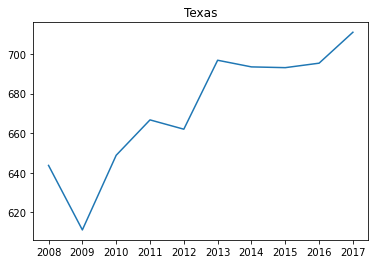

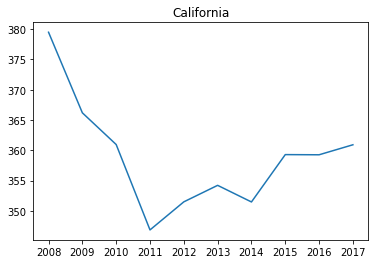

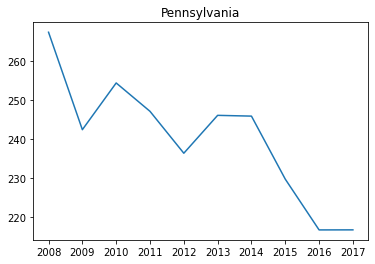

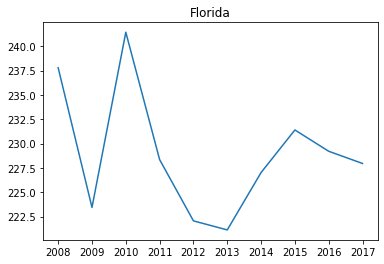

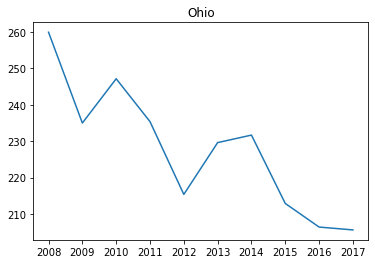

In [9]:
#ploting emissions over time
plt.plot(last_ten_emissions_df.iloc[-8])
plt.title("Texas")
plt.show()
plt.plot(last_ten_emissions_df.iloc[4])
plt.title("California")
plt.show()
plt.plot(last_ten_emissions_df.iloc[38])
plt.title("Pennsylvania")
plt.show()
plt.plot(last_ten_emissions_df.iloc[9])
plt.title("Florida")
plt.show()
plt.plot(last_ten_emissions_df.iloc[-16])
plt.title("Ohio")
plt.show()                       

In [23]:
#finding largest emission changes
for row in last_ten_emissions_df.iterrows():
    change_emit = last_ten_emissions_df['2008']-last_ten_emissions_df['2017']
change_emit = change_emit.sort_values(0, ascending=False)
print(change_emit)

State
OH    54.293206
PA    50.807020
IN    50.122083
GA    39.051897
IL    38.388519
KY    36.103504
NC    33.327257
AL    30.647969
NY    29.122454
NJ    24.355660
MD    22.397783
MI    22.060896
TN    22.058179
WV    19.265324
CA    18.567427
OK    18.032393
VA    17.697297
KS    16.080166
AZ    15.987231
SC    15.244004
IA    14.236502
MA    12.653061
MO    12.011533
LA    11.476935
MN    11.145986
UT    10.655933
FL     9.839391
CO     9.481292
NM     7.285327
WI     6.422490
WY     5.799644
MT     5.340556
NH     5.202202
AK     5.140464
NV     4.332245
OR     3.970202
CT     3.898157
ME     3.494132
DE     3.248828
HI     1.580521
RI     0.556899
DC     0.443802
SD     0.377752
VT     0.067746
AR    -0.217920
NE    -1.401923
ID    -3.086710
ND    -3.434176
MS    -3.445123
WA    -3.574918
TX   -67.295583
dtype: float64


In [ ]:
#observations: Texas is by far the largest producer of emissions overall and emissions have increased drastically over time
#Ohio has made the most improvement for producing less emissions
#Questions: What renewable energy sources are used in these places? Is there a correlation between the energy production and
#polution? 